## <span style="color:#0047AB"> **Data Import** </span> <a id="import"></a>

In [1]:
import pickle

import pandas as pd
df=pd.read_csv('clickbait_data.csv')

df

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


### <span style="color:#0047AB"> **Checking for data structure** </span> <a id="structure"></a>  

In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   32000 non-null  object
 1   clickbait  32000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 500.1+ KB



### <span style="color:#0047AB"> **Checking for Null/Missing values** </span> <a id="null"></a>  

In [3]:

df.isnull().sum()

headline     0
clickbait    0
dtype: int64


### <span style="color:#0047AB"> **Data Visualization** </span> <a id="visual"></a>  

<Axes: xlabel='clickbait', ylabel='count'>

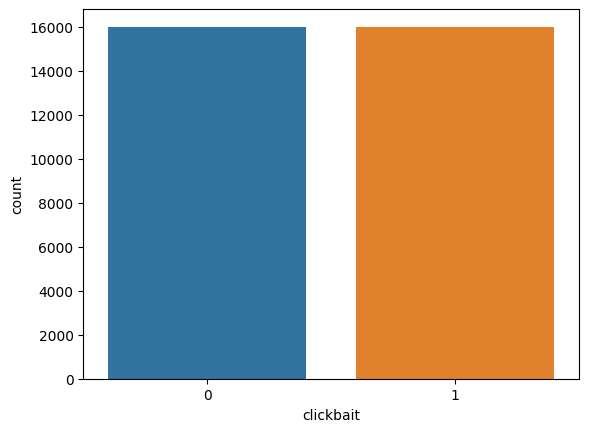

In [4]:
import seaborn as sns
sns.countplot(x=df.clickbait)

In [5]:



from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


def generate_wordCloud(column):
    comment_words = ''
    stopwords = list(STOPWORDS) + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']

    for val in column:
   
        val = str(val)
    
        tokens = val.split()
   
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='white',
                          stopwords = stopwords,
                          min_font_size = 10).generate(comment_words)

   
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [6]:

clickbait_headline = df.loc[df["clickbait"] == 1]
not_clickbait_headline = df.loc[df["clickbait"] == 0]

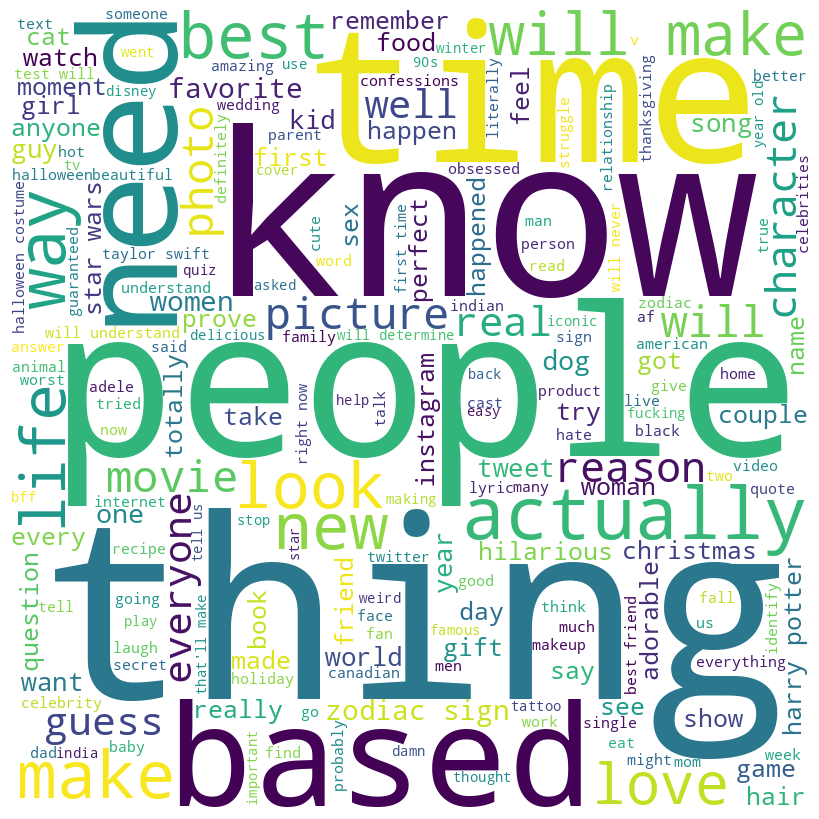

In [7]:

generate_wordCloud(clickbait_headline['headline'])

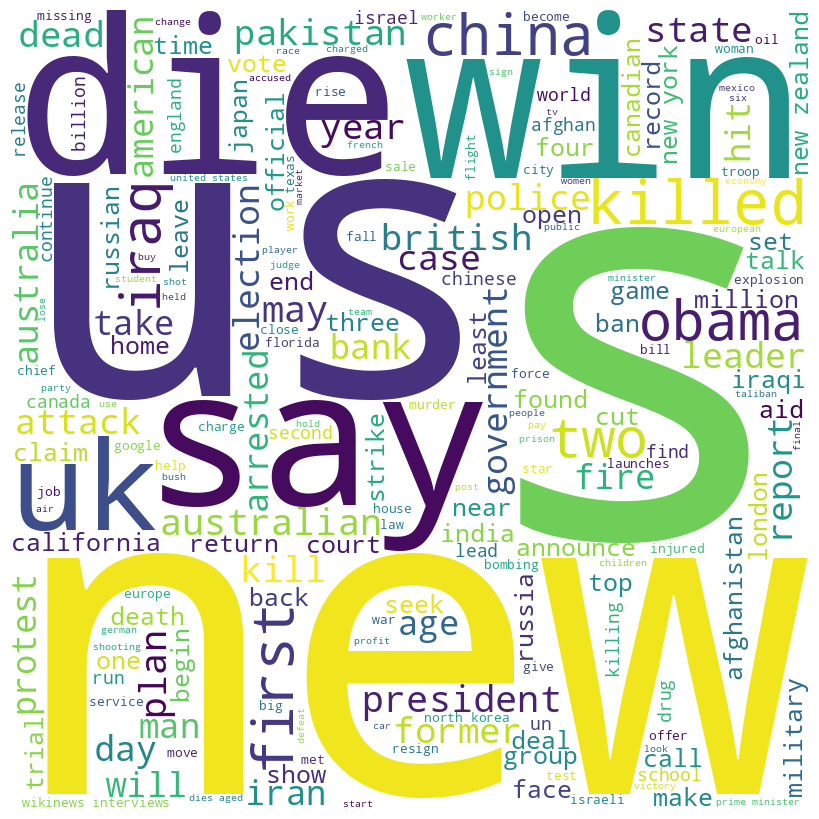

In [8]:

generate_wordCloud(not_clickbait_headline['headline'])

In [9]:

#Importing NLTK library and downloading stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


False

In [10]:

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

def RemoveSpecialCharacters(sentence):
    return re.sub('[^a-zA-Z]+',' ',sentence)

def ConvertToLowerCase(sentence):
    return sentence.lower()

def ConvertAndRemove(sentence):
    sentence = str(sentence)
    sentence = RemoveSpecialCharacters(sentence)
    # convert to lower case
    sentence = ConvertToLowerCase(sentence)
    return sentence

def CleanText(sentence):
    sentence = str(sentence)

    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    
    nopunc = [char for char in sentence if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    sentence = ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])
    sentence = ConvertAndRemove(sentence)
    return sentence

In [11]:
#Function testing
print(CleanText('I am going to the Ne\'therla\'nds and I\'m going to win an Olympic medal.'))

going netherlands going win olympic medal


In [12]:

df['Text_cleaning'] = df.headline.apply(CleanText)
df.head()

,headline,clickbait,Text_cleaning
0,Should I Get Bings,1,get bings
1,Which TV Female Friend Group Do You Belong In,1,tv female friend group belong
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1,new star wars force awakens trailer give chills
3,"This Vine Of New York On ""Celebrity Big Brothe...",1,vine new york celebrity big brother fucking pe...
4,A Couple Did A Stunning Photo Shoot With Their...,1,couple stunning photo shoot baby learning inop...


### <span style="color:#0047AB"> **Data Splitting** </span> <a id="split"></a>


In [13]:
X = df.Text_cleaning
y = df.clickbait

In [14]:
print('the length of our original training data is:',len(X))
print('the length of our original testing data is:',len(y))

the length of our original training data is: 32000
the length of our original testing data is: 32000


In [15]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print('the length of X_train is now:',len(X_train))
print('the length of X_test is now:',len(X_test))
print('the length of y_train is now:',len(y_train))
print('the length of y_test is now:',len(y_test))

the length of X_train is now: 25600
the length of X_test is now: 6400
the length of y_train is now: 25600
the length of y_test is now: 6400


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [18]:
X_train_dtm

<25600x21436 sparse matrix of type '<class 'numpy.int64'>'
	with 152145 stored elements in Compressed Sparse Row format>

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_clean = tfidf_transformer.fit_transform(X_train_dtm)

In [20]:
print(X_train_clean)

  (0, 20691)	0.27874184201961916
  (0, 17768)	0.3345529176182634
  (0, 15408)	0.443280710732536
  (0, 15002)	0.37952311039285885
  (0, 13192)	0.443280710732536
  (0, 12018)	0.32318125012329857
  (0, 5712)	0.30945596770049805
  (0, 3477)	0.2704345505044664
  (1, 19768)	0.4943954061330551
  (1, 19352)	0.6624730736498667
  (1, 8360)	0.5627633686403459
  (2, 19358)	0.398093544057493
  (2, 14980)	0.3044588790043617
  (2, 14484)	0.25078631831387677
  (2, 13284)	0.33813632294469903
  (2, 12879)	0.18494510864592098
  (2, 12716)	0.45227553340304516
  (2, 9559)	0.2966918040963563
  (2, 7673)	0.398093544057493
  (2, 7100)	0.2938265186498573
  (3, 12037)	0.31565021664326437
  (3, 10624)	0.41919574997204595
  (3, 10118)	0.402951847353606
  (3, 8075)	0.2854420765479582
  (3, 7531)	0.3409694430081179
  :	:
  (25596, 11813)	0.5860933147732315
  (25596, 9071)	0.3572209408805257
  (25596, 7075)	0.29993546844497326
  (25596, 6255)	0.43653766312518216
  (25597, 15954)	0.36744333021546094
  (25597, 15204)	

## <span style="color:#0047AB"> **Model Training** </span> <a id="train"></a>

1. Logistic Regression
2. Naïve Bayes
3. Stochastic Gradient Descent
4. K-Nearest Neighbours
5. Decision Tree
6. Random Forest
7. Support Vector Machine

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [22]:
Classifiers = [
{
   'label': 'Logistic Regression',
   'model': LogisticRegression(C=0.00000001,solver='liblinear',max_iter=200, multi_class='auto'),
},
{
    'label': 'SGD Classifier',
    'model': SGDClassifier(loss='log_loss', warm_start=True, max_iter=1000, l1_ratio=0.03, penalty='l2', alpha=1e-4, fit_intercept=False),
},
{
    'label': 'KNeighbours',
    'model': KNeighborsClassifier(n_neighbors=15),
},
{
    'label': 'Decision Tree',
    'model': DecisionTreeClassifier(max_depth=10,random_state=101,max_features= None,min_samples_leaf=15),
},
{
   'label': 'Random Forest',
   'model': RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1,random_state=101,max_features= None,min_samples_leaf = 30),
}
]

In [23]:
from sklearn.metrics import accuracy_score

Accuracy = []
Model = []
prediction = []

for c in Classifiers:
    try:
        classifier = c['model']
        fit = classifier.fit(X_train_clean, y_train)
        pred = fit.predict(X_test_dtm)
    except Exception as e:
        print(f"Error with model {c['label']}: {e}")
        continue
    prediction.append(pred)
    accuracy = accuracy_score(y_test, pred)
    Accuracy.append(accuracy)
    Model.append(c['label'])
    print(f'Accuracy of {c["label"]} is {accuracy}')

# Display results
for model, acc in zip(Model, Accuracy):
    print(f'Model: {model}, Accuracy: {acc}')


Accuracy of Logistic Regression is 0.68390625
Accuracy of SGD Classifier is 0.9421875
Accuracy of KNeighbours is 0.8678125
Accuracy of Decision Tree is 0.6415625
Accuracy of Random Forest is 0.8153125
Model: Logistic Regression, Accuracy: 0.68390625
Model: SGD Classifier, Accuracy: 0.9421875
Model: KNeighbours, Accuracy: 0.8678125
Model: Decision Tree, Accuracy: 0.6415625
Model: Random Forest, Accuracy: 0.8153125


### <span style="color:#0047AB"> **Compare the model performances** </span> <a id="compare"></a>

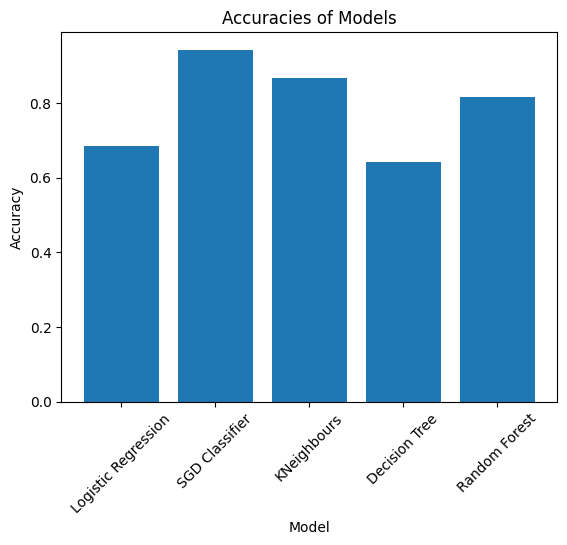

In [24]:
import matplotlib.pyplot as plt
Index = [1,2,3,4,5]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix

# test = confusion_matrix(y_test,prediction[1]).ravel()
# test
for p in prediction:
    true_negative, false_positive, false_negative , true_positive = confusion_matrix(y_test,p).ravel()
    print(true_negative, false_positive, false_negative , true_positive)

3116 11 2012 1261
2944 183 187 3086
2331 796 50 3223
3082 45 2249 1024
2821 306 876 2397


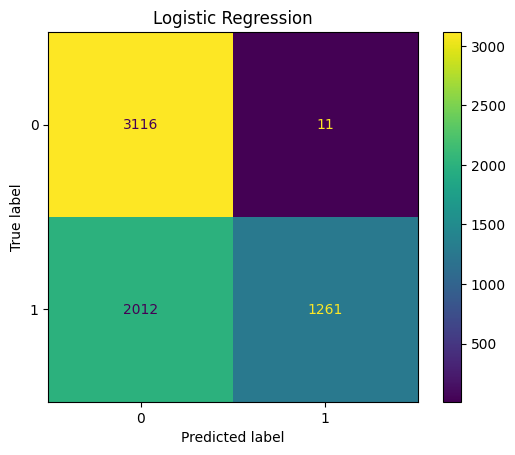

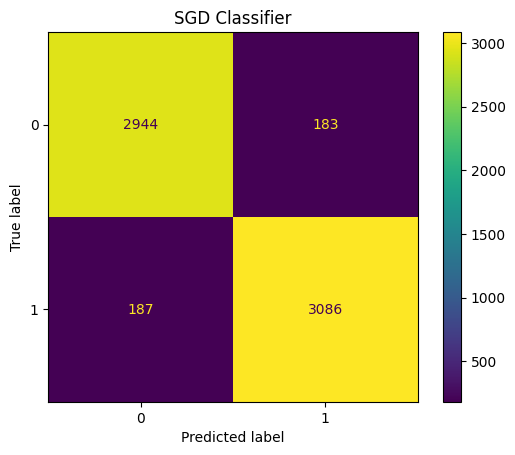

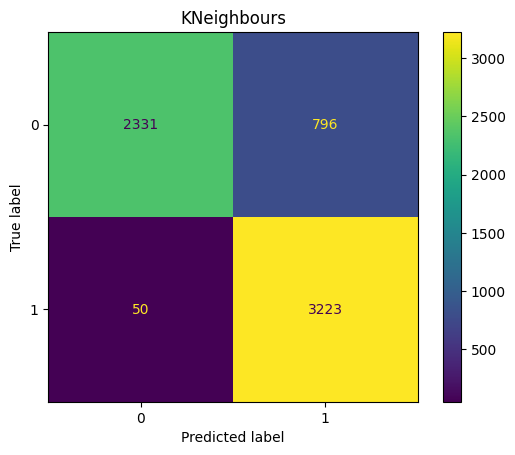

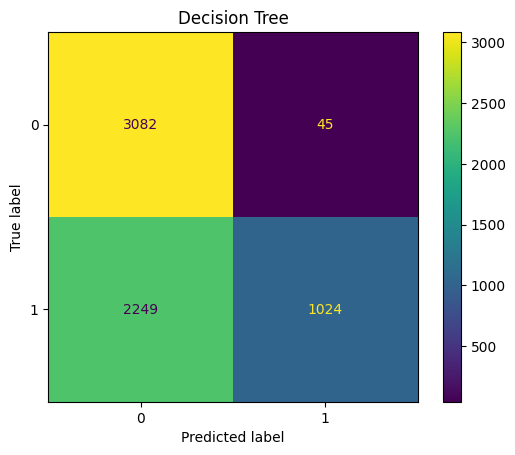

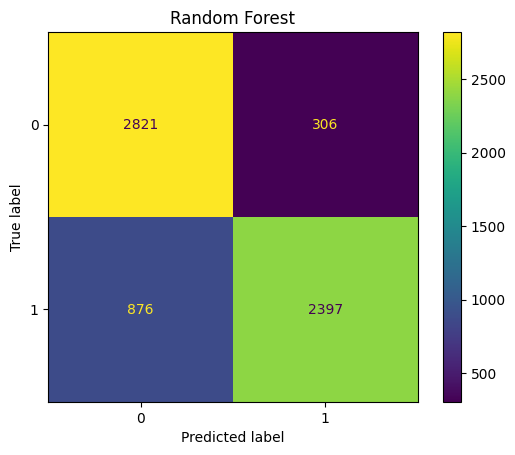

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay

for i,p in enumerate(prediction):
    cm = confusion_matrix(y_test, p, labels=fit.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(values_format='g')
    disp.ax_.set_title(Classifiers[i]['label'])

plt.show()

In [27]:
from sklearn.metrics import precision_score

for i,p in enumerate(prediction):
    prec_score = precision_score(y_test, p, average='weighted')
    print(f"The precision score of {Classifiers[i]['label']} is {prec_score}")


The precision score of Logistic Regression is 0.8038749216979292
The precision score of SGD Classifier is 0.942189840565765
The precision score of KNeighbours is 0.8884510141362861
The precision score of Decision Tree is 0.77234808479192
The precision score of Random Forest is 0.8263332122297018


In [28]:
from sklearn.metrics import recall_score

for i,p in enumerate(prediction):
    recall = recall_score(y_test, p, average='weighted')
    print(f"The recall score of {Classifiers[i]['label']} is {recall}")

The recall score of Logistic Regression is 0.68390625
The recall score of SGD Classifier is 0.9421875
The recall score of KNeighbours is 0.8678125
The recall score of Decision Tree is 0.6415625
The recall score of Random Forest is 0.8153125


In [29]:
from sklearn.metrics import f1_score

for i,p in enumerate(prediction):
    f1 = f1_score(y_test, p, average='weighted')
    print(f"The F1 score of {Classifiers[i]['label']} is {f1}")

The F1 score of Logistic Regression is 0.6526342292050222
The F1 score of SGD Classifier is 0.9421883020916352
The F1 score of KNeighbours is 0.8656224527775089
The F1 score of Decision Tree is 0.5972921556322573
The F1 score of Random Forest is 0.8142179676354891


## <span style="color:#0047AB"> **Model Testing** </span> <a id="test"></a>


In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', Classifiers[1]['model'])])
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 SGDClassifier(fit_intercept=False, l1_ratio=0.03,
                               loss='log_loss', warm_start=True))])

In [31]:
y_pred = pipe.predict(X_test)

In [32]:
#sample clickbait from the dataset
test_sample1=['The New Star Wars: The Force Awakens Trailer Is Here To Give You Chills'] 

#sample not a clickbait from the dataset
test_sample2 = ['Scientology defector arrested after attempting to leave organization']  

#made up sample, expected to be clickbait
test_sample3 =['Hurry grab our promo now!']

prediction = pipe.predict(test_sample3)
if prediction == 0:
  result = 'Not Clickbait'
else:
    result = 'Clickbait'
print(f'The headline is {result}')

The headline is Clickbait


In [33]:
with open('clickbait_model.pkl', 'wb') as model_file:
    pickle.dump(pipe, model_file)
